In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    'error: (.+)\n(.+)',
    'Non-resolvable parent POM',
    #'\[ERROR\] (.+)\n(.+)',
    'there is no POM in this directory',
    'unmappable character for encoding UTF8',
    
]
pa = ProjectAnalysis("Lang",  1)

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix
0,0,687b2e62,SUCCESS,4,LANG-747 NumberUtils does not handle Long Hex ...,{'lastFix': 'NO'}
1,1,2c454a4c,SUCCESS,4,LANG-837 Add ObjectUtils.toIdentityString meth...,{'lastFix': 'NO'}
2,2,47d59745,SUCCESS,5,short circuit (un)capitalize if string is alre...,{'lastFix': 'NO'}
3,3,6b5acb4b,SUCCESS,4,Add tests for new Javadoc examples,{'lastFix': 'NO'}
4,4,de63ae7c,SUCCESS,5,Clarify Javadoc,{'lastFix': 'NO'}


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           1897
commit       1897
build        1897
exec_time    1897
comment      1897
fix          1897
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           1673
commit       1673
build        1673
exec_time    1673
comment      1673
fix          1673
dtype: int64

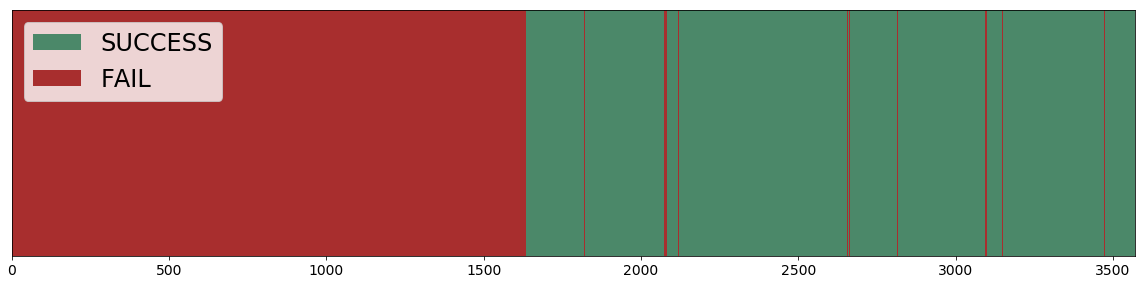

In [6]:
pa.plot_and_save_histogram(1)

## Recogemos todos los fails, los separamos en grupos y obtenemos los logs de cada commit con build fail

In [7]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

## Agrupamos los commits por sus logs

In [8]:
errors = pa.group_errors_by_log(fails, common_errors)

In [9]:
df = pd.DataFrame.from_dict(errors, orient='index')
df=df.groupby(['key','trace']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)
df.to_csv("%s_errors.csv"%pa.project, sep='\t', encoding='utf-8')
df

,,count
key,trace,
25fe7d356a79255e6eb2a6bca03a5f19,there is no POM in this directory,1524
88285ac47cdb7e113b1700f6cd0d94d5,"error: as of release 5, 'enum' is a keyword, and may not be used as an identifier [ERROR] (use -source 1.4 or lower to use 'enum' as an identifier)",109
e7085f728993a692444fe313543c4cf8,error: cannot find symbol [ERROR],20
1b547b59cce8170360f7b25b254cde67,Non-resolvable parent POM,5
312e7e051d00442fdf088e171c481c7f,error: incompatible types [ERROR] -> [Help 1],2
6647b25369208cc6c48dd771f3d78b0b,error: IDKey is not public in org.apache.commons.lang; cannot be accessed from outside package [ERROR],2
a17786c3607dbaaee9f01618604fb6d2,error: variable options might not have been initialized [ERROR] -> [Help 1],2
e36f2da2fd1c72697920f95833010bb0,error: cannot find symbol [ERROR] -> [Help 1],2
00d85ec1281dd9783b78706534db449e,error: reached end of file while parsing [ERROR] -> [Help 1],1


In [10]:
pa.view_log_by_hash(errors,'3e81007975999a8cfc8705c049c2f71e', 0)

Total commits: 1 | Current commit: c28366d8 | Log: 

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for org.apache.commons:commons-lang3:jar:3.0.1
[WARNING] 'build.plugins.plugin.version' for org.apache.maven.plugins:maven-idea-plugin is missing. @ org.apache.commons:commons-parent:21, /root/.m2/repository/org/apache/commons/commons-parent/21/commons-parent-21.pom, line 325, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO]                                                                         
[INFO] ------------------------------------------------------------------------
[INFO] Building Commons Lang 3.0.1
[INFO] ------------------------------------------------------------------------
[INFO] 
[INFO] --

In [11]:
pa.save_success_commits()

Saved at '../Lang/experiment_1/success_commits.txt'
